# Exploring the Tanzania Dataset

In [193]:
import pandas as pd
import numpy as np
import missingno as msn
import seaborn as sns

In [194]:
df = pd.read_csv('data/train.csv')
# df2 = pd.read_csv('data/test.csv')
df3 = pd.read_csv('data/samplesubmission.csv')
df_variableDefinitions = pd.read_csv('data/variabledefinitions.csv')

In [195]:
df_variableDefinitions

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [196]:
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

<Axes: >

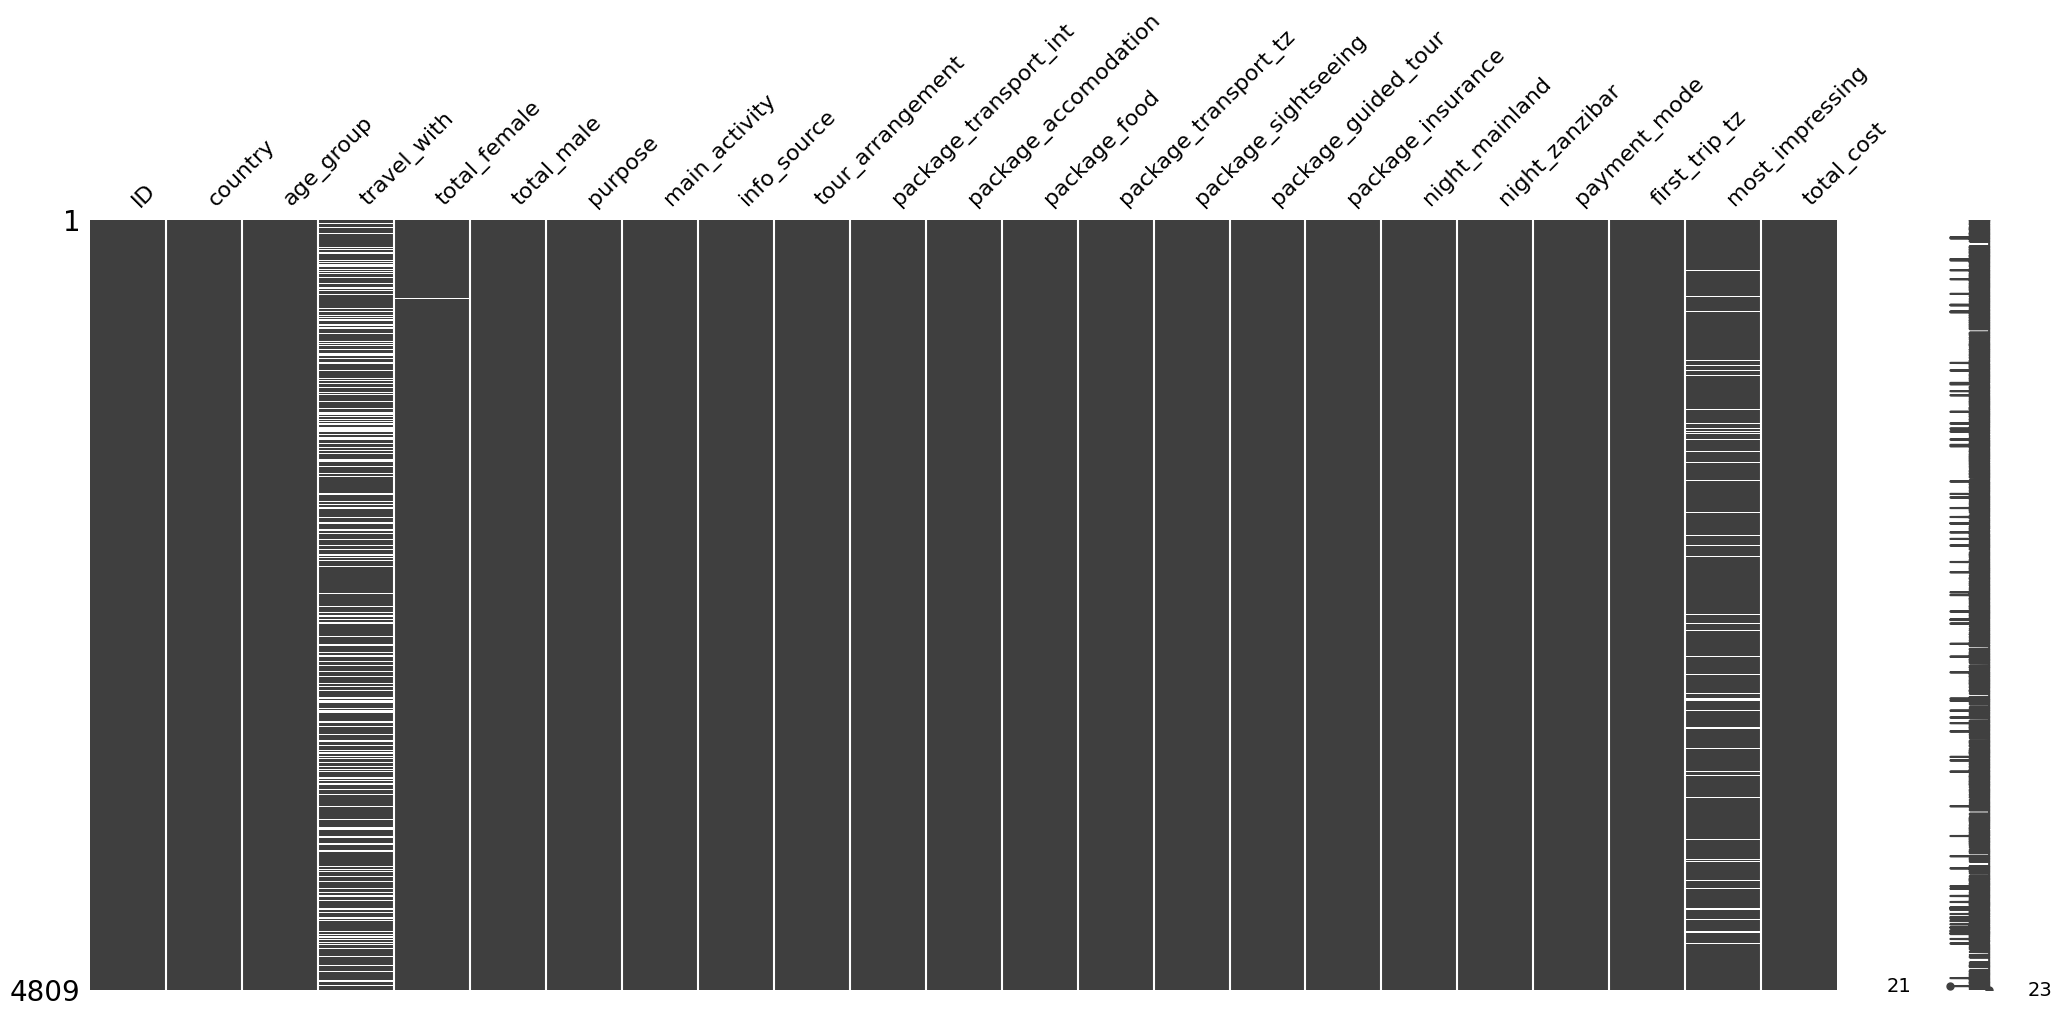

In [198]:
msn.matrix(df)

## Insights
- There are entries missing in 
    - travel_with (23%)
    - most_impressing (6.5%)
    - total_female (0.06%) #
    - total_male (0.1%) #
- There is at least one observation that can be considered as an outlier
    -  value for total_female and total_male is way beyond all the other values
- There are 15 observations where there is no value for both total_female and total_male
    - df[(df.total_female == 0) & (df.total_male == 0)]
## Thoughts & questions
- How to impute missing values?
    - travel_with: 
        - 1085 travelled alone
            -  df[(df.travel_with.isna()) & (df[['total_male', 'total_female']].sum(axis=1) == 1)]
        - 27 did not travel alone
        - for 2 we don't know
    - most_impressing: no_answer

In [199]:
df.travel_with.isna().sum()

1114

In [200]:
# Obversations without values for travel_with where more than 1 person travelled
df[(df.total_female == 0) & (df.total_male == 0)]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
170,tour_1205,UNITED STATES OF AMERICA,25-44,Spouse,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Radio, TV, Web",Package Tour,...,Yes,No,Yes,No,5.0,4.0,Credit Card,No,Excellent Experience,1657500.0
705,tour_1867,HUNGARY,45-64,Spouse and Children,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,4.0,0.0,Cash,Yes,Wildlife,7646047.5
706,tour_1869,UNITED STATES OF AMERICA,45-64,NaN,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,Yes,7.0,0.0,Cash,Yes,No comments,21713250.0
727,tour_1893,UNITED STATES OF AMERICA,45-64,Spouse and Children,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,20.0,0.0,Cash,Yes,Friendly People,19227000.0
1154,tour_2414,GERMANY,45-64,Friends/Relatives,0.0,0.0,Leisure and Holidays,Beach tourism,"Newspaper, magazines,brochures",Package Tour,...,Yes,No,No,No,0.0,33.0,Cash,Yes,Wildlife,67399101.0
1670,tour_3040,ZIMBABWE,1-24,Alone,0.0,0.0,Business,Beach tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,2.0,0.0,Cash,No,No comments,500000.0
2243,tour_3730,UNITED STATES OF AMERICA,65+,Spouse,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,No,No,14.0,0.0,Cash,Yes,Wildlife,16939650.0
2335,tour_3840,SPAIN,25-44,Alone,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,No,4.0,0.0,Cash,Yes,"Wonderful Country, Landscape, Nature",447525.0
2430,tour_396,AUSTRALIA,1-24,Alone,0.0,0.0,Leisure and Holidays,Hunting tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,15.0,5.0,Cash,Yes,Friendly People,11027030.0
2661,tour_425,SPAIN,45-64,Friends/Relatives,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,5.0,6.0,Cash,Yes,Friendly People,19755742.5


In [201]:
# Obversations without values for travel_with where more than 1 person travelled
df[(df.travel_with.isna()) & (df[['total_male', 'total_female']].sum(axis=1) != 1)]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
638,tour_1785,UNITED KINGDOM,25-44,NaN,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,No,7.0,0.0,Cash,Yes,Friendly People,3149250.00
681,tour_1837,UNITED STATES OF AMERICA,1-24,NaN,0.0,4.0,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Package Tour,...,Yes,No,Yes,No,10.0,0.0,Cash,Yes,No comments,4309500.00
706,tour_1869,UNITED STATES OF AMERICA,45-64,NaN,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,Yes,7.0,0.0,Cash,Yes,No comments,21713250.00
717,tour_1881,UNITED STATES OF AMERICA,45-64,NaN,7.0,2.0,Scientific and Academic,Wildlife tourism,"Newspaper, magazines,brochures",Package Tour,...,Yes,Yes,Yes,No,14.0,0.0,Cash,Yes,Friendly People,8038875.00
778,tour_195,EGYPT,25-44,NaN,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,23.0,3.0,Cash,Yes,Wildlife,5304000.00
862,tour_2059,SWEDEN,1-24,NaN,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,No,No,No,32.0,7.0,Cash,Yes,Good service,2070000.00
917,tour_2121,ITALY,45-64,NaN,1.0,1.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,6.0,Cash,No,No comments,82957875.00
1002,tour_2223,CANADA,45-64,NaN,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,5.0,0.0,Cash,No,Wildlife,21810040.00
1149,tour_2409,GERMANY,25-44,NaN,2.0,5.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,14.0,0.0,Cash,Yes,Friendly People,8287500.00
1447,tour_2775,UNITED KINGDOM,45-64,NaN,2.0,0.0,Meetings and Conference,Wildlife tourism,others,Independent,...,No,No,No,No,1.0,0.0,Credit Card,No,Friendly People,497250.00


In [202]:
df.query('tour_arrangement == "Independent"')

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,9.0,0.0,Cash,Yes,Friendly People,466140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4802,tour_99,KENYA,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,10.0,5.0,Cash,Yes,No comments,6464250.0
4803,tour_991,GERMANY,1-24,Friends/Relatives,2.0,0.0,Leisure and Holidays,Beach tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,12.0,7.0,Cash,Yes,No comments,331500.0
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7


In [203]:
df.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [204]:
df.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [205]:
# sns.pairplot(df, hue='total_cost')

In [206]:
df.country.nunique()

105

In [207]:
df[(df['travel_with'].isna()) & ((df['total_female'] == 1) | (df['total_male'] == 1))].sort_values('total_male', ascending=False)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
2106,tour_3557,KENYA,45-64,NaN,1.0,3.0,Meetings and Conference,Mountain climbing,"Travel, agent, tour operator",Independent,...,No,No,No,No,1.0,0.0,Cash,No,Good service,100000.0
2872,tour_450,SPAIN,45-64,NaN,1.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,Yes,11.0,3.0,Cash,Yes,Excellent Experience,6961500.0
2260,tour_375,UNITED STATES OF AMERICA,25-44,NaN,1.0,2.0,Leisure and Holidays,Wildlife tourism,"Radio, TV, Web",Independent,...,No,No,No,No,7.0,6.0,Cash,Yes,Wildlife,10922925.0
2042,tour_3482,EGYPT,25-44,NaN,0.0,1.0,Leisure and Holidays,Conference tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,14.0,0.0,Cash,Yes,"Wonderful Country, Landscape, Nature",4143750.0
1972,tour_3397,FRANCE,25-44,NaN,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,4.0,4.0,Cash,Yes,Wildlife,1939275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,tour_3498,JAPAN,1-24,NaN,1.0,0.0,Scientific and Academic,Hunting tourism,others,Package Tour,...,No,No,Yes,No,3.0,0.0,Cash,Yes,Good service,314925.0
2085,tour_3534,UNITED STATES OF AMERICA,25-44,NaN,1.0,0.0,Leisure and Holidays,Conference tourism,"Friends, relatives",Package Tour,...,Yes,No,Yes,No,10.0,0.0,Cash,Yes,Good service,9945000.0
2122,tour_3577,UNITED KINGDOM,25-44,NaN,1.0,0.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,1422525.0
2126,tour_3581,UAE,1-24,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,No,4.0,4.0,Cash,Yes,Wildlife,12129733.0


In [208]:
df.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [209]:
df.most_impressing.unique()

array(['Friendly People', 'Wonderful Country, Landscape, Nature',
       'Excellent Experience', 'No comments', ' Wildlife', nan,
       'Good service', 'Satisfies and Hope Come Back'], dtype=object)

In [223]:
df.most_impressing.unique()

array(['Friendly People', 'Wonderful Country, Landscape, Nature',
       'Excellent Experience', 'No comments', ' Wildlife', nan,
       'Good service', 'Satisfies and Hope Come Back'], dtype=object)

In [229]:
df.query('most_impressing == "No comments"').count()

ID                       743
country                  743
age_group                743
travel_with              739
total_female             741
total_male               743
purpose                  743
main_activity            743
info_source              743
tour_arrangement         743
package_transport_int    743
package_accomodation     743
package_food             743
package_transport_tz     743
package_sightseeing      743
package_guided_tour      743
package_insurance        743
night_mainland           743
night_zanzibar           743
payment_mode             743
first_trip_tz            743
most_impressing          743
total_cost               743
dtype: int64

In [230]:
print(df['most_impressing'].value_counts())

most_impressing
Friendly People                         1541
 Wildlife                               1038
No comments                              743
Wonderful Country, Landscape, Nature     507
Good service                             365
Excellent Experience                     271
Satisfies and Hope Come Back              31
Name: count, dtype: int64


<Axes: >

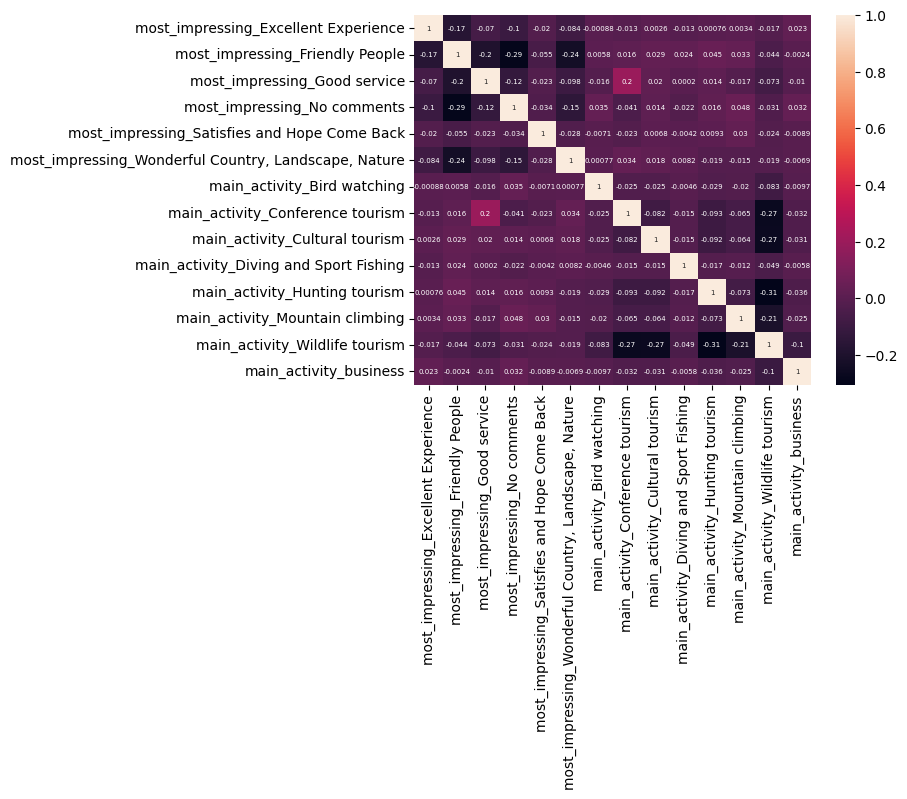

In [221]:
df_test = pd.get_dummies(df[['most_impressing', 'main_activity']], drop_first=True)
df_test.corr()

sns.heatmap(df_test.corr(), annot=True, annot_kws={'size': 5})

In [211]:
df[['first_trip_tz', 'main_activity']]

,first_trip_tz,main_activity
0,No,Wildlife tourism
1,Yes,Cultural tourism
2,No,Cultural tourism
3,Yes,Wildlife tourism
4,Yes,Wildlife tourism
...,...,...
4804,No,Hunting tourism
4805,Yes,Wildlife tourism
4806,Yes,Wildlife tourism
4807,No,Beach tourism


## Preprocessing

### Imputation

In [217]:
# Replace missing values in travel_with where people travelled alone
df.loc[(df.travel_with.isna()) & (df[['total_male', 'total_female']].sum(axis=1) == 1), 'travel_with'] = 'Alone'

df.dropna(subset=['travel_with'])

# df[(df.travel_with.isna()) & (df[['total_male', 'total_female']].sum(axis=1) == 1)]
# Drop missing values in travel_with where we can't imüute the missing values
#df_new = 





,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [213]:
df

TypeError: string indices must be integers, not 'str'

In [219]:
df[(df[['total_male', 'total_female']].sum(axis=1) == 0)]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
170,tour_1205,UNITED STATES OF AMERICA,25-44,Spouse,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Radio, TV, Web",Package Tour,...,Yes,No,Yes,No,5.0,4.0,Credit Card,No,Excellent Experience,1657500.0
705,tour_1867,HUNGARY,45-64,Spouse and Children,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,4.0,0.0,Cash,Yes,Wildlife,7646047.5
706,tour_1869,UNITED STATES OF AMERICA,45-64,NaN,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,Yes,7.0,0.0,Cash,Yes,No comments,21713250.0
727,tour_1893,UNITED STATES OF AMERICA,45-64,Spouse and Children,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,20.0,0.0,Cash,Yes,Friendly People,19227000.0
1154,tour_2414,GERMANY,45-64,Friends/Relatives,0.0,0.0,Leisure and Holidays,Beach tourism,"Newspaper, magazines,brochures",Package Tour,...,Yes,No,No,No,0.0,33.0,Cash,Yes,Wildlife,67399101.0
1670,tour_3040,ZIMBABWE,1-24,Alone,0.0,0.0,Business,Beach tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,2.0,0.0,Cash,No,No comments,500000.0
2243,tour_3730,UNITED STATES OF AMERICA,65+,Spouse,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,No,No,14.0,0.0,Cash,Yes,Wildlife,16939650.0
2335,tour_3840,SPAIN,25-44,Alone,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,No,4.0,0.0,Cash,Yes,"Wonderful Country, Landscape, Nature",447525.0
2430,tour_396,AUSTRALIA,1-24,Alone,0.0,0.0,Leisure and Holidays,Hunting tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,15.0,5.0,Cash,Yes,Friendly People,11027030.0
2449,tour_3980,SOUTH AFRICA,25-44,Friends/Relatives,0.0,NaN,Meetings and Conference,Wildlife tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,4.0,0.0,Credit Card,Yes,Friendly People,3978000.0
